# Lab1: Binary image classifier

## 1. Setup
Install fastbook and setup Google drive connection.

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 9.6 MB/s eta 0:00:00
Mounted at /content/gdrive


Import necessary libraries

In [39]:
from fastbook import *
from fastai.vision.widgets import *

## 2. Download images 
Use Azure image search or DuckDuckGo to download 150 images of each class. Save images to Google drive.

### 2.1 Try it out
Similar to the lecture notebook, try out your query and plot a few of the resulting images to verify that your search returns sensible images.

In [9]:
urls_apple = search_images_ddg('apple phone', max_images=150)
len(urls_apple),urls_apple[0]

(150, 'https://d.ibtimes.co.uk/en/full/1636932/apple-iphone-8.png')

0: https://d.ibtimes.co.uk/en/full/1636932/apple-iphone-8.png
1: https://s3b.cashify.in/gpro/uploads/2021/04/15122238/apple-iphone-14-front.png
2: http://s2.firstpost.in/wp-content/uploads/2020/10/Apple-iphone-se-back-min.jpg
3: https://cdn.macstories.net/purple-phones-1618958972858.png
4: https://www.techbyter.com/2017/images/ApplePhone.png
406 Client Error: Not Acceptable for url: https://www.techbyter.com/2017/images/ApplePhone.png
5: https://cdn.winknews.com/wp-content/uploads/2020/04/Apple-1.jpg
6: https://cupertinotimes.com/wp-content/uploads/2017/04/Apple-Phone.jpeg
7: https://images.esellerpro.com/2131/I/248/076/lrgscaleIphone.JPG
8: https://www.cellularcountry.com/images/Apple_iPhone_5_32GB_Smartphone_-_Unlocked_GSM_-_Black_51831.jpg
404 Client Error: Not Found for url: https://www.cellularcountry.com/images/Apple_iPhone_5_32GB_Smartphone_-_Unlocked_GSM_-_Black_51831.jpg
9: http://www.cellularcountry.com/images/Apple_iPhone_6_64GB_Smartphone_-_Verizon_-_Silver_52880_03.jpg
404

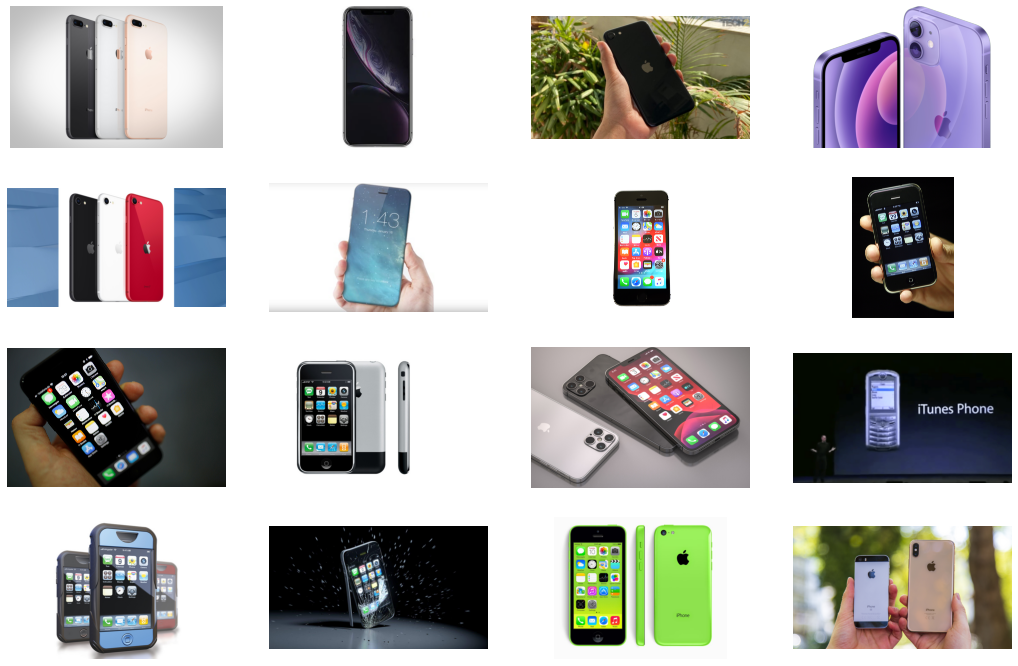

In [10]:
f, axes = plt.subplots(4, 4, figsize=(18,12))
axes = axes.flatten()
ax_i = 0
img_i = 0
while ax_i < len(axes) and img_i < len(urls_apple):
  try:
    url = urls_apple[img_i]
    print(f'{img_i}: {url}')
    image_data = requests.get(url)
    image_data.raise_for_status()
    
    image = Image.open(BytesIO(image_data.content)) 
    axes[ax_i].imshow(image)
    axes[ax_i].axis("off")
    ax_i += 1 # next axis
  except requests.exceptions.RequestException as e:
    print(e)
  finally:
    img_i += 1 # next image, especially when exception occured

      
plt.show()

### 2.2 Get images for the two classes
Download 150 images of each class. Save images to Google drive.  
Remove any corrupt images using `verify_images()`.

In [20]:
export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/')
export_path.ls()

(#4) [Path('/content/gdrive/MyDrive/Colab Notebooks/Copy of 01_intro.ipynb'),Path('/content/gdrive/MyDrive/Colab Notebooks/images'),Path('/content/gdrive/MyDrive/Colab Notebooks/bears_ddg_2023'),Path('/content/gdrive/MyDrive/Colab Notebooks/models')]

In [21]:
dest = export_path/'images/apple_phone.jpg'
download_url(urls_apple[0], dest)

Path('/content/gdrive/MyDrive/Colab Notebooks/images/apple_phone.jpg')

In [22]:
phone_types = 'apple','samsung'
path = export_path/'phone_endg411'

path.exists()

False

In [23]:
if not path.exists():
    path.mkdir()
    for o in phone_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} phone')
        download_images(dest, urls=results)

In [25]:
path.ls()[1].ls()

(#168) [Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/samsung/472b0e55-9b4d-4211-bc2a-b2184fffad83.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/samsung/fc7a66ae-31d6-4a8a-bf15-8785cc911799.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/samsung/f774bd12-b63d-4e3e-88e6-e687c6de529f.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/samsung/3187554d-1973-44cb-a618-82df0e339d9a.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/samsung/14ca4bba-7b17-4ccb-8364-9f1ffca9d086.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/samsung/2ac87d4a-6d3b-41d5-8b30-10f1ba855cb9.cms'),Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/samsung/e4ff0a61-e610-4def-88cc-acb610055c47.jpeg'),Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/samsung/9a36b5ea-94ba-40cf-b8b2-56f24a8499fe.jpeg'),Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/samsung/e4c23c9a-e2f6-4b05-86c6-e2e1ad22dd

In [28]:
#Check if any download failed

fns = get_image_files(path)
failed = verify_images(fns)
failed

#After running it once, the failed images are removed

(#0) []

In [29]:
failed.map(Path.unlink); 

## 3. Setup image loaders
Setup image loaders, use 20% of images for validation, and show one batch for each training and validation dataset.

In [30]:
phones = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=844), 
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())


In [32]:
dls = phones.dataloaders(path)

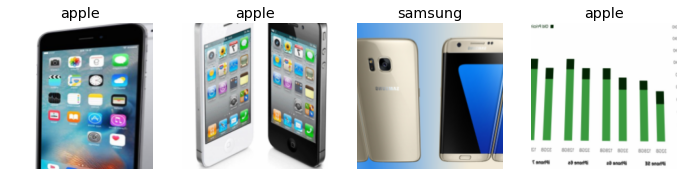

In [33]:
dls.train.show_batch(max_n=4, nrows=1)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


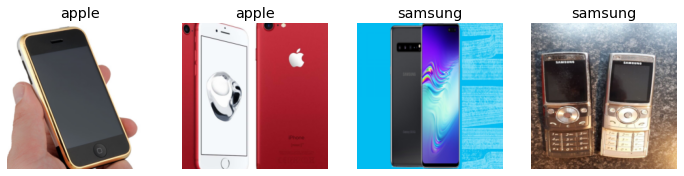

In [34]:
dls.valid.show_batch(max_n=4, nrows=1)

In [46]:
dls.train.items

[Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/samsung/607fbda4-43d3-4018-8090-03dd89b590c4.jpg'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/apple/bd748d2b-e6ee-4149-abb0-0d8a9ed9f977.jpg'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/samsung/517e75f8-edcc-4f0f-a162-36af45c4cc95.jpeg'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/samsung/d2565759-1772-45f6-af13-cd22575ccb7d.jpg'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/apple/afeb7746-d358-4b59-a33c-a69b54f10061.jpg'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/apple/5f5b5032-6dd8-4d1c-ab69-a32d6b4d9d98.jpg'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/apple/892279a5-8499-4864-9130-342d2e92b8ef.jpg'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/apple/b5699b9d-2d32-4297-9486-a8ea5e422f7b.jpg'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/phone_endg411/samsung/361ce8d5-d48d-4902-84b5-4b27bb83863f

In [38]:
len(dls.valid.items)

68

In [40]:
train_set.targets.bincount()

NameError: ignored

**Question 1:** How many images of each class are in trainging and validation sets?

Because we are splitting 20% of the data, there are 120 images in the training and 30 images in the validation set. 

## 4. Setup vision learner
Setup a vision learner with the dataloaders, `resnet18` architecture and `error_rate` as metric.

In [42]:
learn = vision_learner(dls, resnet18, metrics=error_rate)


## 5. Train binary classifier
Fine tune for 10 epochs and show results.

In [43]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.082715,1.785165,0.485294,00:17


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.884479,1.150278,0.426471,00:17
1,0.765543,0.724252,0.294118,00:19
2,0.663179,0.495972,0.220588,00:17
3,0.575695,0.429141,0.161765,00:19
4,0.488333,0.433526,0.147059,00:16
5,0.416946,0.415914,0.117647,00:16
6,0.373190,0.396538,0.132353,00:17
7,0.334756,0.404176,0.132353,00:16
8,0.306379,0.413084,0.132353,00:16
9,0.283349,0.413349,0.132353,00:17


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should b

**Question 2:** Is the model overfitting? Why, why not?

The model is probably overfitting after running 10 epoch. It is becasue the gap of training and validation score is increasing, with training score rapidly decreasing while valid score is quite stable. Both of the scores are relatively small so this overfitting is not significant

## 6. Analyze results

Plot confusion matrix.

Plot top 5 losses.


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


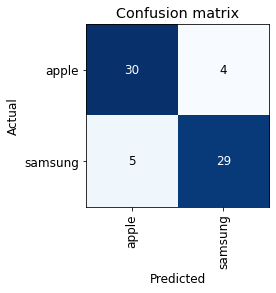

In [44]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

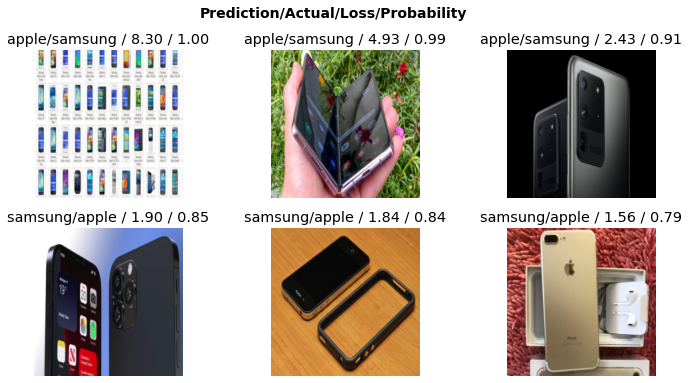

In [45]:
interp.plot_top_losses(6, nrows=2, figsize=(12,6))

**Question 3:** How many false positive, false negative errors?

False positive is 5 and false negative is 4. They incorrectly predicted 5 apple phones and 4 samsung phones. 

## 7. Summary and Conclusion

Summarize:
- Type of classifier trained.
- Number of images of each class in the training validation sets
- Error rate achieved

Vision learner classifier was trained. Number 

Conclusion:
- Are there any problems with data/labeling?
- Are you satisfied with model performance? Why, why not?

*YOUR ANSWER HERE*


## 8. Reflection
Include a sentence or two about 
- what you liked or disliked, 
- found interesting, confusing, challangeing, motivating 

while working on this assignment.

*YOUR ANSWER HERE*